In [45]:
!pip install unidecode


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Intalacion de librerias
Empezamos instalando las librerias necesarias para el desarrollo del punto

In [46]:
import pandas as pd
from unidecode import unidecode
import re
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Lectura de los datos

In [47]:
df_train = pd.read_csv("./data/categories/train.csv")
df_test = pd.read_csv("./data/categories/test.csv")
index_test = df_test['index']
df_complete = pd.concat([df_train,df_test])
index = df_complete['index']
titulo = df_complete['titulo']
categoria = df_train['categoria']

In [48]:
df_complete.head(10)

,index,titulo,categoria
0,610,"""De nada sirven los triunfos si la paz no los ...",Película y Animación
1,819,"""Hay mejores formas para uno mostrar su forma ...",Película y Animación
2,637,#LosNacionalesXSeñal - Bahía Cupica,Deportes
3,740,#LosNacionalesXSeñal - Estudiantes Utech balon...,Deportes
4,160,#LosNacionalesXSeñal - Las pruebas de triatlón...,Deportes
5,101,"#LosNacionalesXSeñal - María Elena Hurtado, la...",Deportes
6,405,#LosNacionalesXSeñal - Niños voley playa,Deportes
7,681,#LosNacionalesXSeñal - ¡Hicimos historia!,Deportes
8,428,#PedaleoPor: Ariel Molina envía un saludo a lo...,Deportes
9,13,#PedaleoPor: Ariel Molina envía un saludo a lo...,Deportes


In [49]:
titulo.head(20)

0     "De nada sirven los triunfos si la paz no los ...
1     "Hay mejores formas para uno mostrar su forma ...
2                   #LosNacionalesXSeñal - Bahía Cupica
3     #LosNacionalesXSeñal - Estudiantes Utech balon...
4     #LosNacionalesXSeñal - Las pruebas de triatlón...
5     #LosNacionalesXSeñal - María Elena Hurtado, la...
6              #LosNacionalesXSeñal - Niños voley playa
7             #LosNacionalesXSeñal - ¡Hicimos historia!
8     #PedaleoPor: Ariel Molina envía un saludo a lo...
9     #PedaleoPor: Ariel Molina envía un saludo a lo...
10    #PedaleoPor: Dagoberto López envía un saludo a...
11    #PedaleoPor: Esteban Kekessy envía un saludo a...
12    #PedaleoPor: Henry García envía un saludo a lo...
13    #PedaleoPor: James Guevara envía un saludo a l...
14    #PedaleoPor: Javier Cruz envía un saludo a los...
15    #PedaleoPor: Javier Rodríguez envía un saludo ...
16    #PedaleoPor: Jonathan Devía envía un saludo a ...
17    #PedaleoPor: Jorge Merchán envía un saludo

# Modificacion de los datos
Para este caso y para que funcione correctamente la tokenizacion y el stemmer debemos de hacer las siguientes modificaciones a los datos:
- Poner el contenido en minuscula
- Eliminar los acentos
- Eliminar los caracteres especiales

In [50]:
titulo = titulo.str.lower()

In [51]:
titulo.head(20)

0     "de nada sirven los triunfos si la paz no los ...
1     "hay mejores formas para uno mostrar su forma ...
2                   #losnacionalesxseñal - bahía cupica
3     #losnacionalesxseñal - estudiantes utech balon...
4     #losnacionalesxseñal - las pruebas de triatlón...
5     #losnacionalesxseñal - maría elena hurtado, la...
6              #losnacionalesxseñal - niños voley playa
7             #losnacionalesxseñal - ¡hicimos historia!
8     #pedaleopor: ariel molina envía un saludo a lo...
9     #pedaleopor: ariel molina envía un saludo a lo...
10    #pedaleopor: dagoberto lópez envía un saludo a...
11    #pedaleopor: esteban kekessy envía un saludo a...
12    #pedaleopor: henry garcía envía un saludo a lo...
13    #pedaleopor: james guevara envía un saludo a l...
14    #pedaleopor: javier cruz envía un saludo a los...
15    #pedaleopor: javier rodríguez envía un saludo ...
16    #pedaleopor: jonathan devía envía un saludo a ...
17    #pedaleopor: jorge merchán envía un saludo

In [52]:
titulo = titulo.apply(unidecode)

In [53]:
titulo.head(20)

0     "de nada sirven los triunfos si la paz no los ...
1     "hay mejores formas para uno mostrar su forma ...
2                   #losnacionalesxsenal - bahia cupica
3     #losnacionalesxsenal - estudiantes utech balon...
4     #losnacionalesxsenal - las pruebas de triatlon...
5     #losnacionalesxsenal - maria elena hurtado, la...
6              #losnacionalesxsenal - ninos voley playa
7             #losnacionalesxsenal - !hicimos historia!
8     #pedaleopor: ariel molina envia un saludo a lo...
9     #pedaleopor: ariel molina envia un saludo a lo...
10    #pedaleopor: dagoberto lopez envia un saludo a...
11    #pedaleopor: esteban kekessy envia un saludo a...
12    #pedaleopor: henry garcia envia un saludo a lo...
13    #pedaleopor: james guevara envia un saludo a l...
14    #pedaleopor: javier cruz envia un saludo a los...
15    #pedaleopor: javier rodriguez envia un saludo ...
16    #pedaleopor: jonathan devia envia un saludo a ...
17    #pedaleopor: jorge merchan envia un saludo

In [54]:
def quitar_caracteres_especiales(texto):
    return re.sub(r'[^A-Za-z ]+', '', texto)
titulo = titulo.apply(quitar_caracteres_especiales)

In [55]:
titulo.head(20)

0     de nada sirven los triunfos si la paz no los c...
1     hay mejores formas para uno mostrar su forma d...
2                     losnacionalesxsenal  bahia cupica
3      losnacionalesxsenal  estudiantes utech balonmano
4     losnacionalesxsenal  las pruebas de triatlon l...
5     losnacionalesxsenal  maria elena hurtado la pe...
6                losnacionalesxsenal  ninos voley playa
7                 losnacionalesxsenal  hicimos historia
8     pedaleopor ariel molina envia un saludo a los ...
9     pedaleopor ariel molina envia un saludo a los ...
10    pedaleopor dagoberto lopez envia un saludo a l...
11    pedaleopor esteban kekessy envia un saludo a l...
12    pedaleopor henry garcia envia un saludo a los ...
13    pedaleopor james guevara envia un saludo a los...
14    pedaleopor javier cruz envia un saludo a los e...
15    pedaleopor javier rodriguez envia un saludo a ...
16    pedaleopor jonathan devia envia un saludo a lo...
17    pedaleopor jorge merchan envia un saludo a

## Obtener todas las palabras que se tienen en todos los textos

In [56]:
def obtener_palabras_unicas(texto, diccionario):
    palabras = re.findall(r'\b\w+\b', texto)
    for palabra in palabras:
        diccionario[palabra] = 0
        
palabras_unicas = {}

titulo.apply(lambda x: obtener_palabras_unicas(x, palabras_unicas))

df_palabras_unicas = pd.DataFrame(palabras_unicas.keys(), columns=["Palabra"])
df_palabras_unicas.head(20)

,Palabra
0,de
1,nada
2,sirven
3,los
4,triunfos
5,si
6,la
7,paz
8,no
9,corona


In [57]:
len(df_palabras_unicas)

1848

## Contar cuantas veces se muestra cada palabra en cada texto

Primero copiamos el Dataframe antes generado

In [58]:
df_matriz_frecuencia = pd.DataFrame(palabras_unicas, index=titulo)
df_matriz_frecuencia.iloc[:,:7]

,de,nada,sirven,los,triunfos,si,la
titulo,,,,,,,
de nada sirven los triunfos si la paz no los corona lapazhabla,0,0,0,0,0,0,0
hay mejores formas para uno mostrar su forma de pensar sofia,0,0,0,0,0,0,0
losnacionalesxsenal bahia cupica,0,0,0,0,0,0,0
losnacionalesxsenal estudiantes utech balonmano,0,0,0,0,0,0,0
losnacionalesxsenal las pruebas de triatlon llenaron de emocion al municipio de prado,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
como ensenarle a los papas a reciclar,0,0,0,0,0,0,0
como es tu municipio los ninos de paicol nos cuentan,0,0,0,0,0,0,0
los ninos podemos cambiar el mundo,0,0,0,0,0,0,0


In [59]:
df_matriz_frecuencia.columns

Index(['de', 'nada', 'sirven', 'los', 'triunfos', 'si', 'la', 'paz', 'no',
       'corona',
       ...
       'ensenarle', 'papas', 'reciclar', 'paicol', 'cuentan', 'podemos',
       'cambiar', 'ejemplar', 'dan', 'opinion'],
      dtype='object', length=1848)

Ahora si contamos la frecuencia de cada palabra en cada texto

In [60]:
for indice, fila in df_matriz_frecuencia.iterrows():
    for palabra in df_matriz_frecuencia.columns:
        titulo_interno = fila.name
        df_matriz_frecuencia.at[fila.name,palabra] = titulo_interno.split().count(palabra)

In [61]:
df_matriz_frecuencia.iloc[:,:7]

,de,nada,sirven,los,triunfos,si,la
titulo,,,,,,,
de nada sirven los triunfos si la paz no los corona lapazhabla,1,1,1,2,1,1,1
hay mejores formas para uno mostrar su forma de pensar sofia,1,0,0,0,0,0,0
losnacionalesxsenal bahia cupica,0,0,0,0,0,0,0
losnacionalesxsenal estudiantes utech balonmano,0,0,0,0,0,0,0
losnacionalesxsenal las pruebas de triatlon llenaron de emocion al municipio de prado,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...
como ensenarle a los papas a reciclar,0,0,0,1,0,0,0
como es tu municipio los ninos de paicol nos cuentan,1,0,0,1,0,0,0
los ninos podemos cambiar el mundo,0,0,0,1,0,0,0


## Aplicacion de token y stemmer

llego el momento de aplicar el stemmer y el tokenizado a todos los texto esto para generar las palabras raices de cada una de las palabras y ademas vamos a ayudarnos de las "Stop Words" para eliminar contenido que no nos sirve mucho de ayuda ya que son palabras que se son considerabas "inaportantes" en nuestro contexto

In [62]:
#Stemmer
stop_words = set(stopwords.words('spanish'))
def simple_stemmer(text):
    stemmer = SnowballStemmer("spanish")
    tokenizers = ToktokTokenizer()
    tokens = tokenizers.tokenize(text)
    tokens = [stemmer.stem(token.strip()) for token in tokens if token not in stop_words]
    text = " ".join(tokens)
    return text

titulo = titulo.apply(simple_stemmer)

In [63]:
titulo.head(10)

0                   sirv triunf si paz coron lapazhabl
1                      mejor form mostr form pens sofi
2                       losnacionalesxsenal bahi cupic
3            losnacionalesxsenal estudi utech balonman
4    losnacionalesxsenal prueb triatlon llen emocio...
5     losnacionalesxsenal mari elen hurt pel antioquen
6                   losnacionalesxsenal nin voley play
7                      losnacionalesxsenal hic histori
8          pedaleopor ariel molin envi salud escarabaj
9          pedaleopor ariel molin envi salud escarabaj
Name: titulo, dtype: object

In [64]:
df_corr_dummies = pd.get_dummies(df_complete['categoria'].head(800), columns=['categoria'], drop_first=True)
df_corr_dummies.corr()

,Educación,Entretenimiento,Gente y Blogs,Otros,Película y Animación
Educación,1.000000,-0.252130,-0.109116,-0.102464,-0.213035
Entretenimiento,-0.252130,1.000000,-0.167260,-0.157064,-0.326553
Gente y Blogs,-0.109116,-0.167260,1.000000,-0.067973,-0.141324
Otros,-0.102464,-0.157064,-0.067973,1.000000,-0.132709
Película y Animación,-0.213035,-0.326553,-0.141324,-0.132709,1.000000


## Visualizacion de la matriz de correlacion

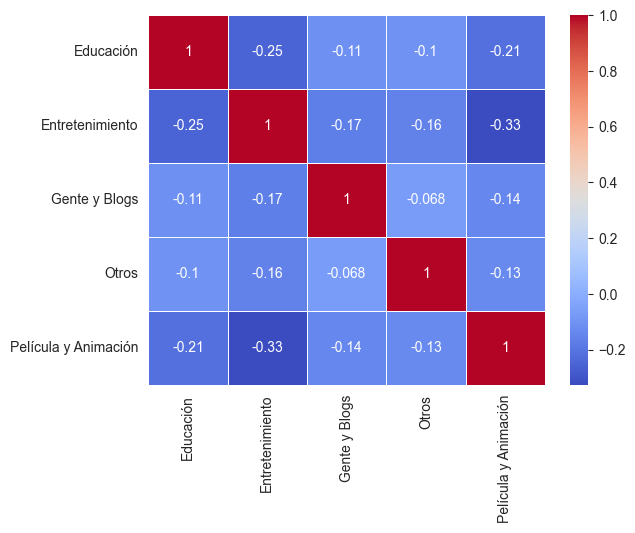

In [65]:
plt.Figure(figsize=(8,6))
sns.heatmap(df_corr_dummies.corr(),annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Para este caso podemos ver que todas tienen una correlacion negativa, unas mas que otras, pero en general podriamos concluir a partir de esto que entre mas cantidad de categorias haya de una variable pues menos categorias habra de las otras, y tiene mucho sentido

# Term Frequency (Matriz TF)

Para realizar el Term Frequency necesitamos contar la frecuencia precisamente que aparece cada palabra en cada texto

In [66]:
palabras_unicas = {}

titulo.apply(lambda x: obtener_palabras_unicas(x, palabras_unicas))

df_palabras_unicas = pd.DataFrame(palabras_unicas.keys(), columns=["Palabra"])
df_palabras_unicas.head(20)

,Palabra
0,sirv
1,triunf
2,si
3,paz
4,coron
5,lapazhabl
6,mejor
7,form
8,mostr
9,pens


In [67]:
len(df_palabras_unicas)

1596

In [68]:
df_matriz_TF = pd.DataFrame(palabras_unicas, index=titulo)
df_matriz_frecuencia = pd.DataFrame(palabras_unicas, index=titulo)
df_matriz_TF.iloc[:,:7]

,sirv,triunf,si,paz,coron,lapazhabl,mejor
titulo,,,,,,,
sirv triunf si paz coron lapazhabl,0,0,0,0,0,0,0
mejor form mostr form pens sofi,0,0,0,0,0,0,0
losnacionalesxsenal bahi cupic,0,0,0,0,0,0,0
losnacionalesxsenal estudi utech balonman,0,0,0,0,0,0,0
losnacionalesxsenal prueb triatlon llen emocion municipi prad,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
ensen pap recicl,0,0,0,0,0,0,0
municipi nin paicol cuent,0,0,0,0,0,0,0
nin pod cambi mund,0,0,0,0,0,0,0


Procedemos a contar la cantidad que aparece cada palabra, pero esta vez en su forma raiz, asi podremos reducir la cantidad de datos que vayamos a procesar ya que puede ser que en cada texto se produzca la misma palabra raiz

In [69]:
# Definir la nueva matriz de frecuencia con las nuevas palabras y hacer el conteo de cada palabra en cada titulo
df_matriz_frecuencia = df_matriz_frecuencia.astype(float)
for indice, fila in df_matriz_frecuencia.iterrows():
    for palabra in df_matriz_frecuencia.columns:
        titulo_interno = fila.name
        titulo_interno_vector = titulo_interno.split()
        df_matriz_frecuencia.at[titulo_interno,palabra] = titulo_interno_vector.count(palabra)

In [70]:
df_matriz_frecuencia.iloc[:,:7]

,sirv,triunf,si,paz,coron,lapazhabl,mejor
titulo,,,,,,,
sirv triunf si paz coron lapazhabl,1.0,1.0,1.0,1.0,1.0,1.0,0.0
mejor form mostr form pens sofi,0.0,0.0,0.0,0.0,0.0,0.0,1.0
losnacionalesxsenal bahi cupic,0.0,0.0,0.0,0.0,0.0,0.0,0.0
losnacionalesxsenal estudi utech balonman,0.0,0.0,0.0,0.0,0.0,0.0,0.0
losnacionalesxsenal prueb triatlon llen emocion municipi prad,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
ensen pap recicl,0.0,0.0,0.0,0.0,0.0,0.0,0.0
municipi nin paicol cuent,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nin pod cambi mund,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Por ultimo sacamos los valores del TF dividiendo la cantidad que aparece esa palabra en el texto por el total de palabras que hay en cada texto, que basicamente seria un porcentaje, de la siguiente forma:

<center>$TF = \frac{Palabra}{Total Palabras Texto}$</center>

In [71]:
df_matriz_TF = df_matriz_TF.astype(float)
for indice, fila in df_matriz_TF.iterrows():
    titulo_interno = fila.name
    titulo_interno_vector = titulo_interno.split()
    for palabra in df_matriz_TF.columns:
        df_matriz_TF.at[titulo_interno,palabra] = (titulo_interno_vector.count(palabra))/len(titulo_interno_vector)
df_matriz_TF.iloc[:,:7]

,sirv,triunf,si,paz,coron,lapazhabl,mejor
titulo,,,,,,,
sirv triunf si paz coron lapazhabl,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000
mejor form mostr form pens sofi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
losnacionalesxsenal bahi cupic,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
losnacionalesxsenal estudi utech balonman,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
losnacionalesxsenal prueb triatlon llen emocion municipi prad,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
ensen pap recicl,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
municipi nin paicol cuent,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nin pod cambi mund,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Inverse Document Frequency (Vector IDF)
El IDF refleja la proporcion de textos que contienen cada palabra, para nuestro caso vamos a usar logaritmo natural y la formual es la siguiente:

<center>$TF = log(\frac{CantidadTextos}{NumeroDocuementosContienenPalabra+1})$</center>

Se le suma un 1 al denominador para evitar la singularidad de dividir por 0

In [72]:
cantidad_documentos = len(df_matriz_frecuencia)
df_matriz_IDF = pd.DataFrame(columns=['Transformacion'], index=palabras_unicas)
for indice, fila in df_matriz_IDF.iterrows():
    palabra_interna = fila.name
    cantidad_total_palabra = df_matriz_frecuencia[f'{palabra_interna}'].sum()
    df_matriz_IDF.loc[palabra_interna] = math.log(cantidad_documentos/(cantidad_total_palabra+1))
df_matriz_IDF.iloc[:,:7]

,Transformacion
sirv,6.214608
triunf,5.298317
si,5.115996
paz,5.298317
coron,6.214608
...,...
pod,6.214608
cambi,6.214608
ejempl,6.214608
dan,6.214608


In [73]:
df_matriz_IDF = df_matriz_IDF.transpose()

## TF-IDF

Esta es la multiplicacion entre la matriz TF y el vector IDF:

<center>$TF-IDF=TF*IDF$</center>

In [74]:
df_matriz_tf_idf = df_matriz_TF.copy()

In [75]:
for indice, fila in df_matriz_TF.iterrows():
    titulo_interno = fila.name
    for palabra in df_matriz_TF.columns:
        df_matriz_tf_idf.at[titulo_interno,palabra] = df_matriz_tf_idf.at[titulo_interno,palabra]*df_matriz_IDF.at['Transformacion',palabra]

In [76]:
df_matriz_tf_idf.iloc[:,:7]

,sirv,triunf,si,paz,coron,lapazhabl,mejor
titulo,,,,,,,
sirv triunf si paz coron lapazhabl,1.035768,0.883053,0.852666,0.883053,1.035768,0.96819,0.000000
mejor form mostr form pens sofi,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.689194
losnacionalesxsenal bahi cupic,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
losnacionalesxsenal estudi utech balonman,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
losnacionalesxsenal prueb triatlon llen emocion municipi prad,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...
ensen pap recicl,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
municipi nin paicol cuent,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
nin pod cambi mund,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


Con esta matriz generada vamos a entrenar los modelos de Regresion logistica y Random Forest

# Entrenamientos:
### Regresion logistica

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test, y_train,y_test = train_test_split(df_matriz_tf_idf.head(800),categoria,test_size=0.2)

In [79]:
count_vect = CountVectorizer(min_df=1, max_df=100000, binary=False, ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(df_train)
count_vect_test = count_vect.transform(df_test)

In [80]:
logistic_model = LogisticRegression(penalty="l2", max_iter=500, C=1.0, random_state=42)

In [81]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=800, random_state=42)

In [82]:
logistic_prediction = logistic_model.predict(X_test)

Evaluemos las metricas sobre los mismos datos que estamos entrenando

In [83]:
print(f'Exactitud: {accuracy_score(y_test,logistic_prediction)}')

Exactitud: 0.7


In [84]:
df_train['categoria'].unique()

array(['Película y Animación', 'Deportes', 'Gente y Blogs',
       'Entretenimiento', 'Otros', 'Educación'], dtype=object)

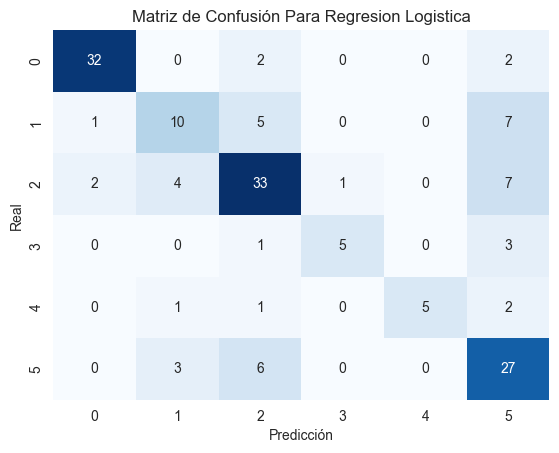

In [85]:
matriz_confusion_regresion = confusion_matrix(y_test, logistic_prediction)
sns.heatmap(matriz_confusion_regresion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Para Regresion Logistica')
plt.show()

### Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [87]:
param_grid = {
    'n_estimators': [50, 100, 200,300],  # Diferentes cantidades de árboles
    'max_depth': [None, 10, 20, 30, 35],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10, 15]  # Número mínimo de muestras para dividir un nodo
}

In [88]:
random_forest_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 35],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [89]:
best_random_forest_model = grid_search.best_estimator_
best_random_forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [90]:
random_forest_prediction = best_random_forest_model.predict(X_test)

In [91]:
print(f'Exactitud: {accuracy_score(y_test,random_forest_prediction)}')

Exactitud: 0.7375


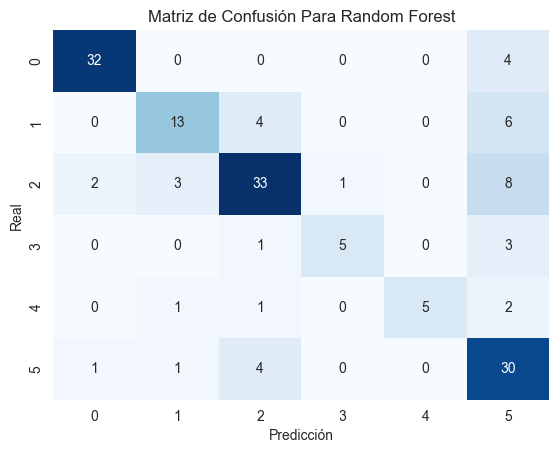

In [92]:
matriz_confusion_rf = confusion_matrix(y_test, random_forest_prediction)
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Para Random Forest')
plt.show()

### LSTM

In [93]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelBinarizer

In [101]:
label = LabelBinarizer()
max_words = 1700
max_len = 15
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_train["titulo"])
sequences = tokenizer.texts_to_sequences(df_train["titulo"])
sequences = pad_sequences(sequences, maxlen=max_len)
y = label.fit_transform(categoria)
X_train, X_test, y_train, y_test = train_test_split(sequences, y, test_size=0.2)

In [102]:
from keras.src.callbacks import EarlyStopping

lstm_model = Sequential()
lstm_model.add(layers.Embedding(input_dim=max_words, output_dim=40, input_length=max_len))
lstm_model.add(layers.SpatialDropout1D(0.7))
lstm_model.add(layers.LSTM(128, dropout=0.3, recurrent_dropout=0.3))
lstm_model.add(layers.Dense(6, activation='softmax'))
lstm_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = lstm_model.fit(X_train,y_train, epochs=100, validation_data=(X_test,y_test),batch_size=512, callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/100
2/2 [==============================] - 7s 507ms/step - loss: 1.7891 - accuracy: 0.1953 - val_loss: 1.7739 - val_accuracy: 0.2313
Epoch 2/100
2/2 [==============================] - 0s 96ms/step - loss: 1.7689 - accuracy: 0.2906 - val_loss: 1.7533 - val_accuracy: 0.2313
Epoch 3/100
2/2 [==============================] - 0s 99ms/step - loss: 1.7432 - accuracy: 0.2906 - val_loss: 1.7200 - val_accuracy: 0.2313
Epoch 4/100
2/2 [==============================] - 0s 88ms/step - loss: 1.6989 - accuracy: 0.2906 - val_loss: 1.6907 - val_accuracy: 0.2313
Epoch 5/100
2/2 [==============================] - 0s 92ms/step - loss: 1.6668 - accuracy: 0.2906 - val_loss: 1.7088 - val_accuracy: 0.2313
Epoch 6/100
2/2 [==============================] - 0s 92ms/step - loss: 1.6661 - accuracy: 0.2906 - val_loss: 1.6777 - val_accuracy: 0.2313
Epoch 7/100
2/2 [==============================] - 0s 91ms/step - loss: 1.6535 - accuracy: 0.2906 - val_loss: 1.6679 - val_accuracy: 0.2313
Epoch 8/100
2/2 [==

In [103]:
accr = lstm_model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

5/5 [==============================] - 0s 6ms/step - loss: 1.2784 - accuracy: 0.5437
Test set
  Loss: 1.278
  Accuracy: 0.544


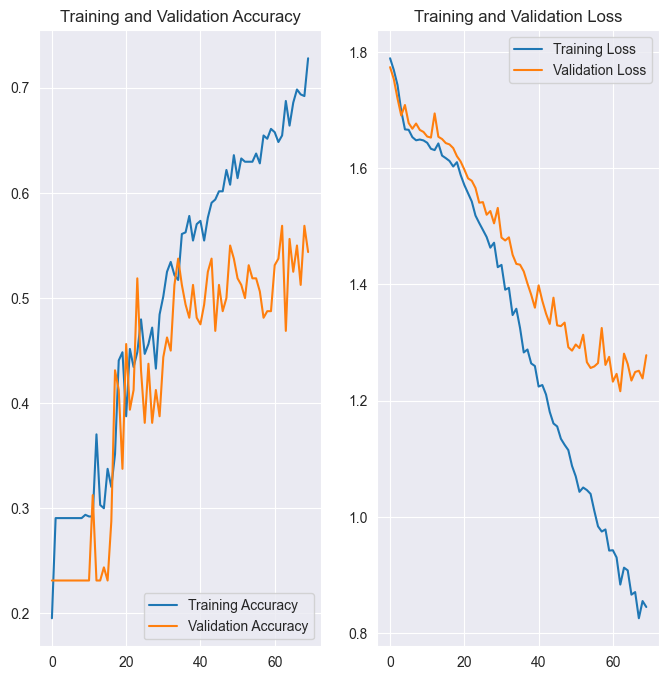

In [104]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(70)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [105]:
lstm_prediction = lstm_model.predict(X_test)

5/5 [==============================] - 1s 7ms/step


In [106]:
lstm_prediction = np.argmax(lstm_prediction, axis=1)
y_real = np.argmax(y_test, axis=1)

In [107]:
print(f'Exactitud: {accuracy_score(y_real,lstm_prediction)}')

Exactitud: 0.54375


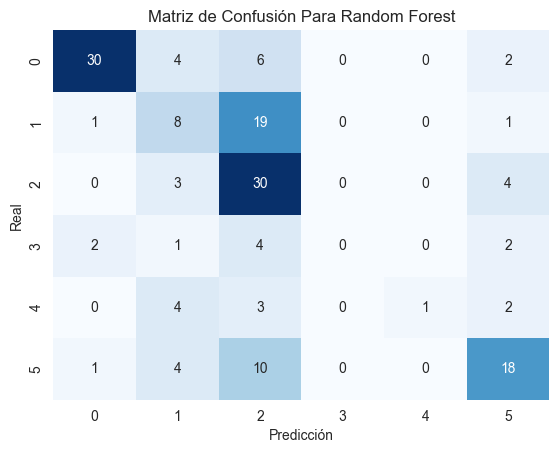

In [108]:
matriz_confusion_rf = confusion_matrix(y_real, lstm_prediction)
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Para Random Forest')
plt.show()

# Resultado final
Para este caso ya no vamos a divir el modelo de entrenamiento sino que vamos a entrenar completamente cada modelo con todos los datos de etrenamiento

### Regresion Logistica

In [110]:
logistic_model = LogisticRegression(penalty="l2", max_iter=500, C=1.0, random_state=42)
logistic_model.fit(df_matriz_tf_idf.head(800), categoria)

LogisticRegression(max_iter=500, random_state=42)

Se escogen los ultimos 200 datos ya que esos son los datos de test que fusionamos anteriormente

In [111]:
logistic_prediction = logistic_model.predict(df_matriz_tf_idf.tail(200))

In [112]:
df_answer_logistic = pd.DataFrame(data= zip(index_test,logistic_prediction),
                         columns=["ID","categoria"])

In [122]:
df_answer_logistic.to_csv("./predictions/categories/prediction_logistic.csv", index=False)

### Random Forest

In [115]:
random_forest_prediction = best_random_forest_model.predict(df_matriz_tf_idf.tail(200))

In [116]:
df_answer_random_forest = pd.DataFrame(data= zip(index_test,random_forest_prediction),
columns=["ID","categoria"])

In [117]:
df_answer_random_forest.to_csv("./predictions/categories/prediction_random_forest.csv", index=False)

### LSTM

In [118]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_test['titulo'])
sequences = tokenizer.texts_to_sequences(df_test['titulo'])
sequences = pad_sequences(sequences, maxlen=max_len)

In [119]:
lstm_prediction = lstm_model.predict(sequences)
lstm_prediction = label.inverse_transform(lstm_prediction)

7/7 [==============================] - 1s 7ms/step


In [120]:
df_answer_lstm = pd.DataFrame(data= zip(index_test,lstm_prediction),
                                       columns=["ID","categoria"])

In [121]:
df_answer_lstm.to_csv("./predictions/categories/prediction_lstm.csv", index=False)

# Conclusion

Segun los datos analizados y el accuracy y la matriz de confusion de cada uno de los modelos, el mejor modelo para este contexto en especifico es el modelo de Random Forest